In [ ]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

In [70]:
Nν_shell = 10
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2"#"../test/test_data/ED_s1.jld2"
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
n_iω = trunc(Int, size(χsp,3)/2);

In [ ]:
f = jldopen(testf, "r")
sVk = sum(f["Vₖ"].^2)
n = f["nden"]
μ = f["μ"]
n_iν = f["grid_nFermi"]
shift = f["grid_shift"]
c2 = μ-U*(n/2)
c3 = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2)

# Spin Channel Tests

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 52
i_sp, Fsp_tr, χsp_tr,χspLoc_tr, λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-9);
i_ch, Fch_tr, χch_tr,χchLoc_tr, λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-9);

test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += (U^2/2) * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - (U^2/2) * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-4.2,-3.8), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

In [ ]:
using LinearAlgebra
#Fsp_shell10
plot(real.(diag(Fsp_tr[end])),ylims=(-4.2,-3.8))
plot!(real.(diag(Fsp_shell10)),ylims=(-4.2,-3.8))

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2/2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - U^2/2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-3.0,-1.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 30
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *  real(helper.χpp_asympt[ll2[i]])
end1
heatmap(test, clim=(-1.4,-0.8), title="ν+ν'+ω, ω₁ test")

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *real(helper.χpp_asympt[ll2[i]])
end
p = if ωi == 22
    heatmap(test, clim=(-1.3,-1.2), title="ν+ν'+ω, ω₀ test") #(-3.3,-2.7)
else
    heatmap(test, clim=(-3.3,-2.7), title="ν+ν'+ω, ω₀ test")
end
display(p)

# Charge Channel Test

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_ch, Fch_tr, χch_tr,χchLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_ch, Fch_tr, χch_tr,χcgLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += 2*U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.9,0.8), title="ν+ν'+ω, ω₀ test")

In [ ]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.1,0.8), title="ν+ν'+ω, ω₁ test")

In [ ]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λsp_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λsp_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λsp_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λsp_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-3.5,-3.0)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-0.1,0.1)
p1 = heatmap(real.(χsp_tr[1]), title="χsp_s1 it 1",clim=clim)
p2 = heatmap(real.(χsp_tr[2]), title="χsp_s1 it 2",clim=clim)
p3 = heatmap(real.(χsp_tr[4]), title="χsp_s1 it 4",clim=clim)
p4 = heatmap(real.(χsp_tr[end]), title="χsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

# Full Convergence Tests

In [ ]:
clim = (-3.25,-3.15)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-3.3,-2.9)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
# χ_asympt only in corners
clim = (-1.0,0.68)
p1 = heatmap(real.(Fch_tr[1]) .- U, title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]) .- U, title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]) .- U, title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]) .- U, title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
size(Fch_tr[end])
plot(real.(Fch_tr[end][171,:]))
pl_arr = zeros(size(Fch_tr[end],1))
for i in 10:length(pl_arr)
    pl_arr[i] = real(Fch_tr[end][i,end-i+10])
end
plot(real.(Fch_tr[end][101,:]))
#plot!(pl_arr)

In [ ]:
clim = (-0.002,0.002)
p1 = heatmap(real.(χch_tr[1]), title="χch it 1",clim=clim)
p2 = heatmap(real.(χch_tr[2]), title="χch it 2",clim=clim)
p3 = heatmap(real.(χch_tr[3]), title="χch it 4",clim=clim)
p4 = heatmap(real.(χch_tr[end]), title="χch it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
# everything treated equally in asympt
χch_a_pl = zeros(size(Fch_tr[1]))
χsp_a_pl = zeros(size(Fch_tr[1]))
χpp_a_pl = zeros(size(Fch_tr[1]))
I_all = union(helper.I_core, helper.I_asympt)
n_iω = trunc(Int,size(χsp,3)/2)
n_iν = trunc(Int,size(χsp,1)/2)
i1,i2 = aux_indices(I_all, ωi, n_iω, n_iν, helper.shift)
for i in 1:length(I_all)
    ii = I_all[i]
    χch_a_pl[ii] = (U^2/2)*real(helper.χch_asympt[i1[i]])
    χsp_a_pl[ii] = 3*(U^2/2)*real(helper.χsp_asympt[i1[i]])
    χpp_a_pl[ii] = -(U^2/2)*real(helper.χpp_asympt[i2[i]])
end
clim = (-0.05,0.05)
p1 = heatmap(χch_a_pl, title="(U^2/2)* χch_asympt",clim=clim)
p2 = heatmap(χsp_a_pl, title="3*(U^2/2)*χsp_asympt",clim=clim)
p3 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p4 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p = plot(p1,p2,p3,p3, layout=(2,2))

In [ ]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λch_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λch_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[3]), title="λch_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λch_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
# \lambda only on sides
clim = (0.6,0.9)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
clim = (-0.01,0.01)
p11 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

In [ ]:
clim = (-0.1,0.1)
p11 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

In [ ]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

# Direct Asympt Tests

In [71]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")
Nν_shell = 10
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2"#"../test/test_data/ED_s1.jld2"
#testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"
#testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b08u2_small.jld2"#"../test/test_data/ED_s1.jld2"

gImp_loc_test, χ₀_loc_test, χsp_loc_test, χch_loc_test, helper, U, β = setup(testf, Nν_shell);

test_lambda = "/home/julian/Hamburg/ED_data/asympt_tests/b14u1_lambda.jld2"
λch_ed_asym, λsp_ed_asym, λpp_ed_asym = load(test_lambda, "λch", "λsp", "λpp");
λch_ed_amp_asym, λsp_ed_amp_asym, λpp_ed_amp_asym = load(test_lambda, "λch_amp", "λsp_amp", "λpp_amp");
γch_ed_asym, γsp_ed_asym, γpp_ed_asym = load(test_lambda, "γch", "γsp", "γpp");

In [72]:
function χ₀_shell_sum_core2(β::Float64, ω_ind_grid::AbstractVector{Int}, n_iν::Int, shift)
   res = OffsetArray(zeros(ComplexF64, length(ω_ind_grid), 4), ω_ind_grid, 1:4)
   iω_grid = iω_array(β, ω_ind_grid)
   for ωn in ω_ind_grid
        si = shift*trunc(Int,ωn/2)
        iν_ind_grid = (-n_iν-abs(minimum(ω_ind_grid))-si):(n_iν+abs(maximum(ω_ind_grid))-si-1)
        iν_grid = OffsetArray(iν_array(β, iν_ind_grid), iν_ind_grid)
        for νn in (-n_iν-si):(n_iν-si-1)
            res[ωn,1] += 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^1) 
            res[ωn,2] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^2) 
            res[ωn,3] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^2) 
            res[ωn,4] += 1/(iν_grid[νn]^3 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^3) 
        end
    end
    return res
end

function χ₀_shell_sum2(core::OffsetArray{ComplexF64,2}, ωn::Int, β::Float64, c1::Float64, c2::Float64, c3::Float64)::ComplexF64
    res = (core[ωn,1] + c1*core[ωn,2] + c2*core[ωn,3] + c3*core[ωn,4])/β
    ωn2 = 2*(2*ωn*π/β)^2
    res += ωn == 0 ? (β/4-c2*β^3/48-c3*β^3/24) : ((c3-c2)*β/ωn2)
    return res
end

χ₀_shell_sum2 (generic function with 1 method)

In [73]:
f = jldopen(testf, "r")
FUpDo = permutedims(f["FUpDo"],(2,3,1));
Σ_loc_in = 1 ./ f["g0"] .- 1 ./ f["gImp"];
sVk = sum(f["Vₖ"].^2)
n = f["nden"]
μ = f["μ"]
n_iν = f["grid_nFermi"]
shift = f["grid_shift"]

c2_old = μ-U*(n/2)
c3_old = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2);

c1 = U*n/2 - μ
c2 = [(U*n/2 - μ) ^ 2]
c3 = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2)

n_iω = trunc(Int, size(χsp_loc_test,3)/2);
bs_old = calc_χ₀_shell_sum_old(β, c2_old, c3_old, n_iω, n_iν, shift);
χ₀_core = χ₀_shell_sum_core2(β, -n_iω:n_iω, n_iν, shift)
bs = map(x -> χ₀_shell_sum2(χ₀_core, x, β, c1, c2[1], c3), -n_iω:n_iω);
h = helper;

In [75]:
maximum(abs.(bs_old .+ bs))

7.105427357601002e-15

In [21]:
h.Nν_shell

10

In [14]:
function calc_χλ3(type::Symbol, ωn::Int, χ::AbstractArray{ComplexF64,2}, χ₀::AbstractArray{ComplexF64,1}, U::Float64, β::Float64, c1::Float64, c2::Float64, c3::Float64, h::BSE_Asym_Helper)
    bs = χ₀_shell_sum(h.shell_sum_core, ωn, β, c1, c2, c3)
    s = type == :ch ? -1 : 1
    ind_core = (h.Nν_shell+1):(length(χ₀)-h.Nν_shell)
    χ₀_core = view(χ₀,ind_core)
    λ_core = -s*sum(χ,dims=[2])[:,1] ./ χ₀_core .+ s
    χ_core = sum(χ) /β^2
    F_diag!(type, ωn, U, β, χ₀, h)
    λ = (λ_core .- s*view(h.diag_asym_buffer, ind_core) .+ U*bs)/(1-s*U*bs)
    λ_s = -sum((U .* λ .- s*U) .* χ₀_core)/β^2
    diag_asym_s = -sum(h.diag_asym_buffer .* χ₀)/β^2
    χ = (χ_core - bs*(1+2*λ_s-s*U*bs) - diag_asym_s)/(1-U^2 * bs^2)
    return χ, λ
end


calc_χλ3 (generic function with 1 method)

In [15]:
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")
ωi = 52
ωn = ωi - n_iω - 1

χsp_asym,χch_asym,λsp_asym,λch_asym,tsp,tch = improve_χλ_direct(ωn, χsp_loc_test[:,:,ωi], χch_loc_test[:,:,ωi],
                                                                view(χ₀_loc_test,:,ωi), U, β, bs_old[ωi], helper);;

In [16]:
include("../src/build_chi_asympt.jl")
χsp_ω_loc_test = Array{Float64,1}(undef, size(χsp_loc_test,3))
χch_ω_loc_test = Array{Float64,1}(undef, size(χch_loc_test,3))
λsp_ω_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χsp_loc_test,3))
λch_ω_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χch_loc_test,3))
χsp_ω_int_loc_test = Array{ComplexF64,1}(undef, size(χsp_loc_test,3))
χch_ω_int_loc_test = Array{ComplexF64,1}(undef, size(χch_loc_test,3))
λsp_ω_int_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χsp_loc_test,3))
λch_ω_int_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χch_loc_test,3))
bs = calc_χ₀_shell_sum_old(β, c2_old, c3_old, n_iω, n_iν, shift);
for ωi in 1:size(χch_loc_test,3)
    ωn = ωi - n_iω - 1
    χsp_asym,χch_asym,λsp_asym,λch_asym, λsp_core, λch_core = improve_χλ_direct(ωn, χsp_loc_test[:,:,ωi], χch_loc_test[:,:,ωi],
                                                            view(χ₀_loc_test,:,ωi), U, β, bs[ωi], helper);
    χsp_ω_int_loc_test[ωi],λsp_ω_int_loc_test[:,ωi] = calc_χλ3(:sp, ωn, χsp_loc_test[:,:,ωi],view(χ₀_loc_test,:,ωi), 
                            U, β, c1, c2[1], c3, helper);
    χch_ω_int_loc_test[ωi],λch_ω_int_loc_test[:,ωi] = calc_χλ3(:ch, ωn, χch_loc_test[:,:,ωi],view(χ₀_loc_test,:,ωi), 
                            U, β, c1, c2[1], c3, helper);
    λsp_ω_loc_test[:,ωi] = λsp_asym
    λch_ω_loc_test[:,ωi] = λch_asym
    χsp_ω_loc_test[ωi] = real(χsp_asym)
    χch_ω_loc_test[ωi] = real(χch_asym)
end

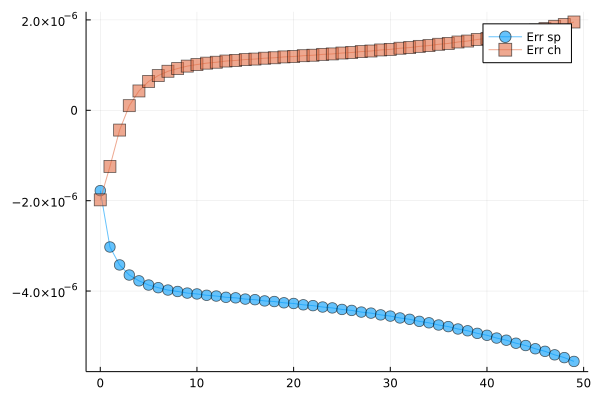

In [17]:
xr = n_iω+1:n_iω+50
rtch = real.(helper.χch_asympt)[1:50]
rtsp = real.(helper.χsp_asympt)[1:50]
plot(xr .- 51,-((χsp_ω_loc_test[xr] .- rtsp)),markersize=6, alpha=0.6, markershape=:auto, label="Err sp")
plot!(xr .- 51,(-(χch_ω_loc_test[xr] .- rtch)),markersize=6, alpha=0.6, markershape=:auto, label="Err ch")

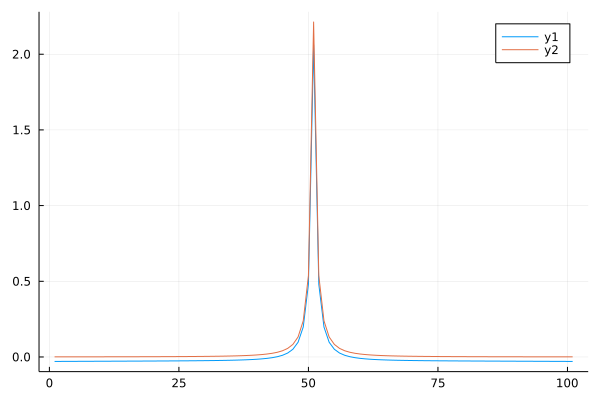

In [18]:
plot(real(χsp_ω_int_loc_test[:]))
plot!(χsp_ω_loc_test)

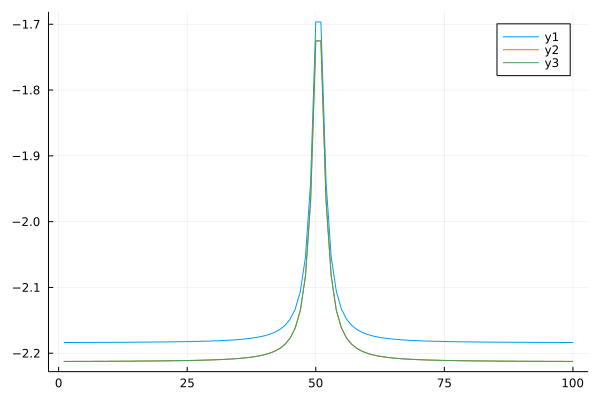

In [19]:
plot(real(λsp_ω_int_loc_test[:,51]))
plot!(real(λsp_ω_loc_test[:,51]))
plot!(real(λsp_ed_amp_asym[51:150,101]) .+ 1)

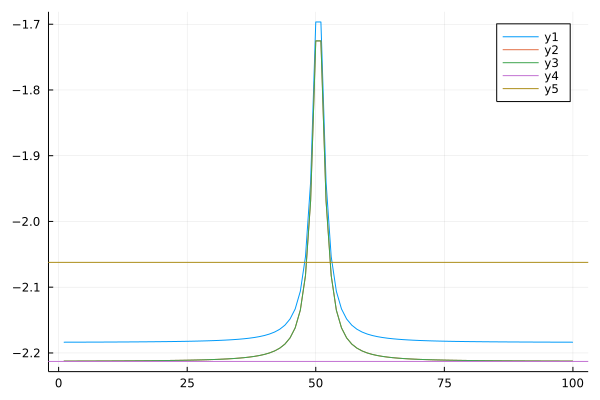

In [12]:
plot(real(λsp_ω_int_loc_test[:,51]))
plot!(real(λsp_ω_loc_test[:,51]))
plot!(real(λsp_ed_amp_asym[51:150,101]) .+ 1)
hline!([-real(χsp_ω_loc_test[51])])
hline!([-real(χsp_ω_int_loc_test[51])])

# Σ_loc,  λ_r, λ_0 tests

Improved asymptotics tests for Σ_loc (lDGA EoM, local case), non-local λʳ(q) and λʳ₀(q) = χʳ₀(q) ⋆ Fʳ

## Comments

Σν_lDGA and Σν_direct do not have a 1/x tail, since all λ tails cancel each other out.

In [44]:

testfc = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_small.toml"
testfc_plain = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_small_plain.toml"
test_06 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b06u1.jld2"
testc_06 = "/home/julian/Hamburg/ED_data/asympt_tests/config_06.toml"
test_10 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b10u1.jld2"
testc_10 = "/home/julian/Hamburg/ED_data/asympt_tests/config_10.toml"
test_14 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"
testc_14 = "/home/julian/Hamburg/ED_data/asympt_tests/config_14.toml"
test_18 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b18u1.jld2"
testc_18 = "/home/julian/Hamburg/ED_data/asympt_tests/config_18.toml"

using Plots
using OffsetArrays
using JLD2
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

using Printf
using Query
using SeriesAcceleration
using TOML

using TimerOutputs
using Pkg
Pkg.activate("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl")
using LadderDGA


sum_freq_full_f! = LadderDGA.sum_freq_full_f!
get_symm_f = LadderDGA.get_symm_f
F_from_χ = LadderDGA.F_from_χ
_eltype = ComplexF64;

using LadderDGA.BSE_SC

  Activating project at `~/Hamburg/Julia_lDGA/LadderDGA.jl`
┌ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]
└ @ Base loading.jl:1423


In [45]:
f = testf
cf_plain = testfc_plain
mP_p, sP_p, env_p, kGridsStr_p = readConfig(testfc_plain);
@timeit LadderDGA.to "setup" Σ_ladderLoc_p, Σ_loc_p, imp_density_p, kG_p, gLoc_fft_p, Γsp_p, Γch_p, χDMFTsp_p, χDMFTch_p, locQ_sp_p, locQ_ch_p, λsp_loc_p, λch_loc_p, χ₀Loc_p, gImp_p = setup_LDGA(kGridsStr_p[1], mP_p, sP_p, env_p);
FUpDo_p = F_from_χ(0.5 * (χDMFTch_p .- χDMFTsp_p), gImp_p[1,1,1,1-minimum(sP_p.fft_range):end], sP_p.n_iω, sP_p.n_iν, sP_p.shift, mP_p.β);
Fsp_p   = F_from_χ(χDMFTsp_p, gImp_p[1,1,1,1-minimum(sP_p.fft_range):end], sP_p.n_iω, sP_p.n_iν, sP_p.shift, mP_p.β);
@timeit LadderDGA.to "nl bblt" bubble_p = calc_bubble(gLoc_fft_p, kG_p, mP_p, sP_p);
@timeit LadderDGA.to "nl xsp" nlQ_sp_p = calc_χ_γ(:sp, Γsp_p, bubble_p, kG_p, mP_p, sP_p);
@timeit LadderDGA.to "nl xch" nlQ_ch_p = calc_χ_γ(:ch, Γch_p, bubble_p, kG_p, mP_p, sP_p);
Σ_ladder_p = calc_Σ(nlQ_sp_p, nlQ_ch_p, bubble_p, gLoc_fft_p, Fsp_p, kG_p, mP_p, sP_p);
Σ_ladder_ν_p = kintegrate(kG_p, Σ_ladder_p, 1)[1,:];

[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!
[ Info: setting usable ranges of sp and ch channel from 41:61 and 41:61 to the same range of 41:61
[ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(41:61) = 0.319, χLoc_ch(41:61) = 0.1339
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.20381585102788577 ?=? 0.22642432530788006 ?≈? 0.22642432530788006 ?≈? 0.25"
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!


In [46]:
f = testf
cf = testfc
mP, sP, env, kGridsStr = readConfig(testfc);
@timeit LadderDGA.to "setup" Σ_ladderLoc, Σ_loc, imp_density, kG, gLoc_fft, Γsp, Γch, χDMFTsp, χDMFTch, locQ_sp, locQ_ch, λsp_loc, λch_loc, χ₀Loc, gImp = setup_LDGA(kGridsStr[1], mP, sP, env);
FUpDo = F_from_χ(0.5 * (χDMFTch .- χDMFTsp), gImp[1,1,1,1-minimum(sP.fft_range):end], sP.n_iω, sP.n_iν, sP.shift, mP.β);
Fsp = F_from_χ(χDMFTsp, gImp[1,1,1,1-minimum(sP.fft_range):end], sP.n_iω, sP.n_iν, sP.shift, mP.β);
@timeit LadderDGA.to "nl bblt" bubble = calc_bubble(gLoc_fft, kG, mP, sP);
@timeit LadderDGA.to "nl xsp" nlQ_sp = calc_χ_γ(:sp, Γsp, bubble, kG, mP, sP);
@timeit LadderDGA.to "nl xch" nlQ_ch = calc_χ_γ(:ch, Γch, bubble, kG, mP, sP);
Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, bubble, gLoc_fft, Fsp, kG, mP, sP);
Σ_ladder_ν = kintegrate(kG, Σ_ladder, 1)[1,:];

[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!
[ Info: setting usable ranges of sp and ch channel from 43:59 and 43:59 to the same range of 43:59
[ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(43:59) = 0.2981, χLoc_ch(43:59) = 0.1241
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.18320594200535187 ?=? 0.21112303414481112 ?≈? 0.21112303414481107 ?≈? 0.25"
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!


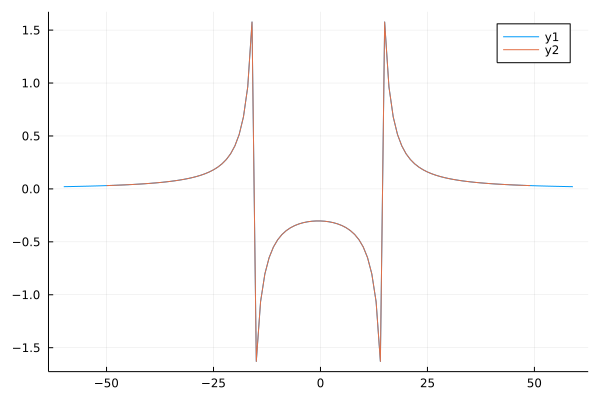

In [47]:
plot(-60:59,real(χ₀Loc.data[1,:,81]))
plot!(-50:49,real(χ₀Loc_p.data[1,:,81]))

In [48]:
ωi = 51
χ₀ = bubble

qi = 1
χ  = zeros(ComplexF64, 1, size(bubble.data,3))
type = :sp
for ωi in 1:size(bubble.data,3)
    ωn = (ωi - sP.n_iω) - 1
    χννpω = deepcopy(Γsp[:,:,ωi])
    for l in 1:2*sP.n_iν
        χννpω[l,l] = Γsp[l,l,ωi] + 1.0/χ₀.data[qi,sP.n_iν_shell+l,ωi]
    end
    χ[qi, ωi], λ_out = LadderDGA.calc_χλ(type, ωn, χννpω, view(χ₀.data,qi,:,ωi), 
            mP.U, mP.β, χ₀.c1, χ₀.c2[qi], χ₀.c3, sP.χ_helper)
end

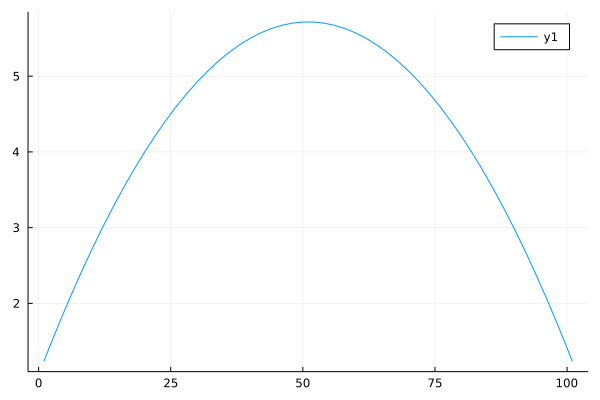

In [49]:
plot(real(χ[1,:]))

In [50]:
γsp_loc_test = (1 .- λsp_ω_loc_test)./transpose(1 .+ U .* χsp_ω_loc_test)
γch_loc_test = (1 .+ λch_ω_loc_test)./transpose(1 .- U .* χch_ω_loc_test)
Σ_h = n*U/2
to_m_index = LadderDGA.to_m_index

ωrange = -2*n_iω:2*n_iω
νrange = -2*n_iν:2*n_iν
ωl = length(ωrange)
νl = length(νrange)
ωrange_s = -n_iω:n_iω
ωl_s = length(ωrange_s)
Σν_direct = OffsetArray(zeros(ComplexF64, ωl),ωrange)
Σν_lDGA =  OffsetArray(zeros(ComplexF64, ωl),ωrange)
Σ_loc = OffsetArray(cat(conj(reverse(Σ_loc_in)),Σ_loc_in, dims=1),-length(Σ_loc_in):length(Σ_loc_in)-1)
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/β,ωrange_s)
ω_sub = OffsetArray(zeros(ComplexF64, ωl),ωrange)
λ_sp_out = OffsetArray(zeros(ComplexF64, νl,ωl_s), νrange, ωrange_s)
λ_ch_out = OffsetArray(zeros(ComplexF64, νl,ωl_s), νrange, ωrange_s)
νn_test = 0
for ωi in 1:size(λch_ω_loc_test,2)
    for νi in 1:size(λch_ω_loc_test,1)
        ωn,νn = OneToIndex_to_Freq(ωi, νi, n_iω, n_iν, shift)
        si = trunc(Int,(ωn)/2) 
        #λ_sp_out[νn, ωn] = λsp_ω_loc_test[νi,ωi]
        #λ_ch_out[νn, ωn] = λch_ω_loc_test[νi,ωi]
        if (νi+si) >= 1 && (νi+si) <= size(γch_loc_test,1)
            Σν_direct[νn] += -(U/β) * 0.5 * (λch_ω_loc_test[νi,ωi] + λsp_ω_loc_test[νi,ωi]) * gImp_loc_test[νn + ωn]
            Σν_lDGA[νn] += -(U/β) * (0.5*γch_loc_test[νi,ωi]*(1-U*χch_ω_loc_test[ωi]) - 1.5*γsp_loc_test[νi,ωi]*(1+U*χsp_ω_loc_test[ωi]) + 1)*gImp_loc_test[νn + ωn] + (U/β) * (λsp_ω_loc_test[νi,ωi]) * gImp_loc_test[νn + ωn]
            subt = (ωn != 0) ? 1/((2π*im*ωn/β)^2) : 0
            ω_sub[νn] += subt
        end
    end
end
Σν_lDGA_sub = Σν_lDGA[0:n_iν-1] ./ (1 .- U*β/12 .- (U/β)*ω_sub[0:n_iν-1])#
Σν_direct_sub = Σν_direct[0:n_iν-1] ./  (1 .- U*β/12 .- (U/β)*ω_sub[0:n_iν-1]);

In [51]:
kGridLoc = gen_kGrid(kGridStr[1], 1)
Σ_ων_test = calc_Σ(locQ_sp, locQ_ch, χ₀Loc,
    gImp, zeros(ComplexF64,size(Fsp)), kGridLoc, mP, sP);

LoadError: UndefVarError: kGridStr not defined

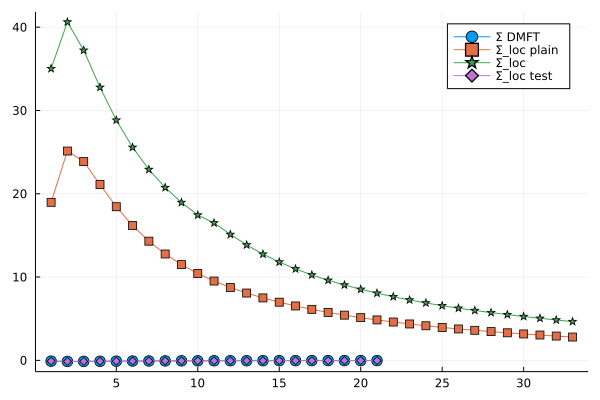

In [52]:
plot(imag(Σ_loc[0:20]), label="Σ DMFT", markershape=:auto, markersize=6)
plot!(imag(Σ_ladderLoc_p[:]), markershape=:auto, label="Σ_loc plain")
plot!(imag(Σ_ladderLoc[:]), markershape=:auto, label="Σ_loc")
plot!(imag(Σν_lDGA[0:20]), markershape=:auto, label="Σ_loc test")

In [53]:
λ_sp_out = to_m_index(λsp_ω_loc_test, sP)
λ_ch_out = to_m_index(λch_ω_loc_test, sP)
xr = 10:45
plot(imag(λ_sp_out[νn_test,xr] .* iω_n_arr[xr]), markershape=:auto, label="λsp[iν_$νn_test] * iω", legend=:bottomright)
plot!(imag(λ_ch_out[νn_test,xr] .* iω_n_arr[xr]), markershape=:auto, label="λch[iν_$νn_test] * iω")
hline!(imag.([Σ_loc[νn_test]]), label="Im(Σ_DMFT[iν_$νn_test])")
hline!(-imag.([Σ_loc[νn_test]]), label="-Im(Σ_DMFT[iν_$νn_test])")

LoadError: UndefVarError: ωl_s not defined

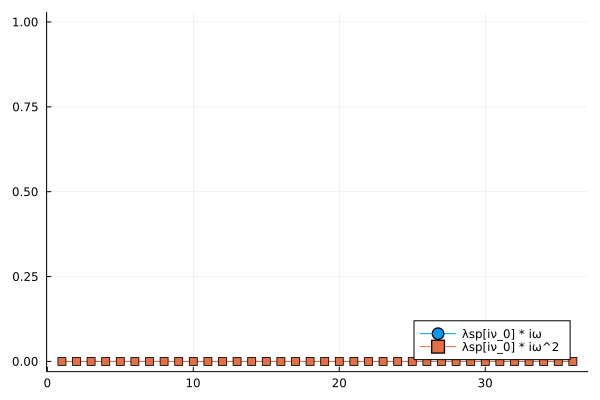

In [54]:
xr = 10:45
plot(real.((λ_sp_out[νn_test,xr] .+ λ_ch_out[νn_test,xr] ) .* iω_n_arr[xr] .^2), markershape=:auto, label="λsp[iν_$νn_test] * iω", legend=:bottomright)
plot!(real.((λ_sp_out[νn_test,xr] ) .* iω_n_arr[xr] .^2), markershape=:auto, label="λsp[iν_$νn_test] * iω^2", legend=:bottomright)

#hline!(imag.([Σ_loc[νn_test]]), label="Im(Σ_DMFT[iν_$νn_test])")
#hline!(-imag.([Σ_loc[νn_test]]), label="-Im(Σ_DMFT[iν_$νn_test])")

In [55]:
using DelimitedFiles
function write_csv() 
    νr_out = -50:50
    for (ii,i) in enumerate(ωrange_s)
        writedlm("lambda_phys_$(lpad(ii-1, 3, "0")).csv", [collect(νr_out) real.(λ_ch_out[νr_out,i]) imag.(λ_ch_out[νr_out,i]) real.(λ_sp_out[νr_out,i]) imag.(λ_sp_out[νr_out,i])], "        \t")
    end
end
#write_csv()

write_csv (generic function with 1 method)

In [56]:
using LsqFit
fitr = 25:n_iω-10
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_n_arr[fitr])
ydata = imag(λ_sp_out[νn_test,fitr] .* iω_n_arr[fitr])
p0 = [0.0, 0.0, 0.0]
fit2 = curve_fit(model, xdata, ydata, p0)
println("Σ_loc(ν_$νn_test) = $(Σ_loc[νn_test])")
println("result $(LsqFit.confidence_interval(fit2, 0.03)) (97% confidence) \n$(fit2.param)  with errors $(estimate_errors(fit2))")

[ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
Σ_loc(ν_0) = 0.4999999999999982 - 0.09785873063807116im
result [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)] (97% confidence) 
[0.0, 0.0, 0.0]  with errors [0.0, 0.0, 0.0]


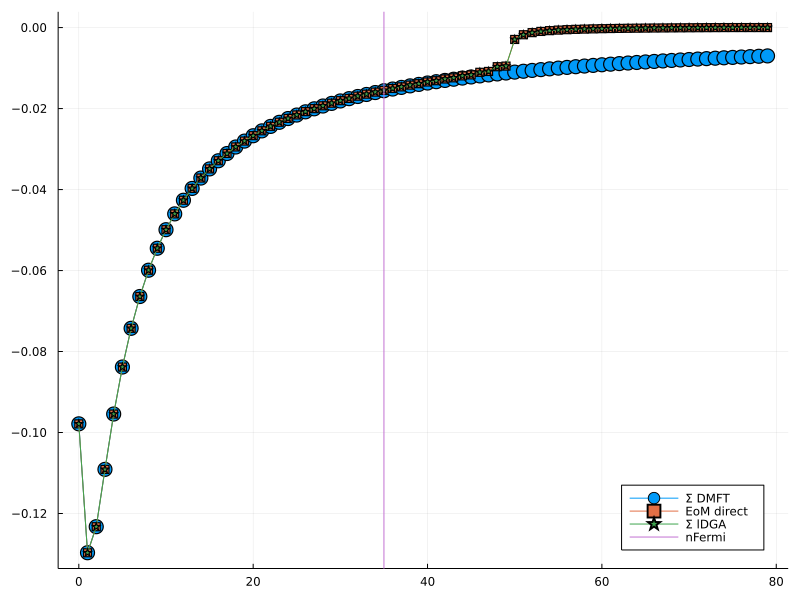

In [57]:
xr = 0:79
plot(xr, imag(Σ_loc[xr]), markershape=:auto,markersize=8, label="Σ DMFT")
plot!(xr, imag.(Σν_direct)[xr], markershape=:auto,size=(800,600), legend=:bottomright, label="EoM direct")
#plot!(xr, imag(Σν_direct_sub[xr .+ 1]), markershape=:auto, label="Σ direct_sub")
plot!(xr, imag(Σν_lDGA[xr]), markershape=:auto, label="Σ lDGA")
#plot!(xr, imag(Σν_lDGA_sub[xr .+ 1]), markershape=:auto, label="Σ lDGA_sub")
vline!([35], label="nFermi")

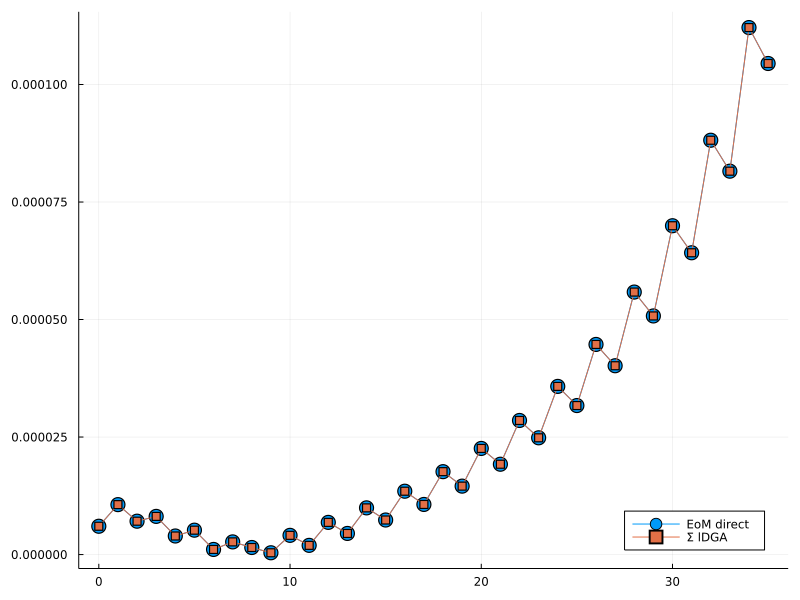

In [58]:
xr = 0:35
plot(xr, abs.(imag.(Σν_direct[xr] .- Σ_loc[xr])), markersize=8, markershape=:auto,size=(800,600), legend=:bottomright, label="EoM direct")
plot!(xr, abs.(imag.(Σν_lDGA[xr] .- Σ_loc[xr])), markershape=:auto, label="Σ lDGA")

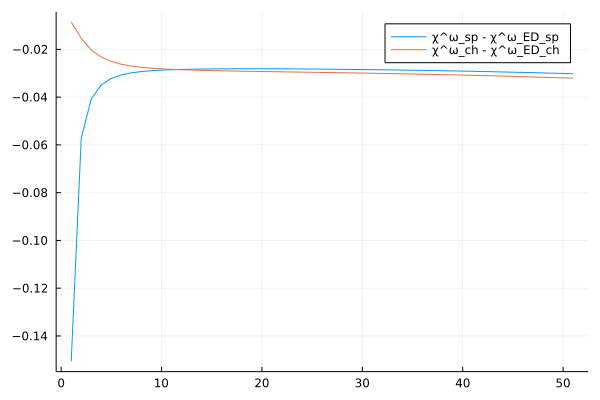

In [59]:
f = jldopen("/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2","r")
xsp_as = f["χ_sp_asympt"];
xch_as = f["χ_ch_asympt"];
close(f)
plot(real.(locQ_sp.χ[1,51:end] .- xsp_as[1:51] ./ mP.β^2), label="χ^ω_sp - χ^ω_ED_sp")
plot!(real.(locQ_ch.χ[1,51:end] .- xch_as[1:51] ./ mP.β^2), label="χ^ω_ch - χ^ω_ED_ch")

43:59 : 41:61


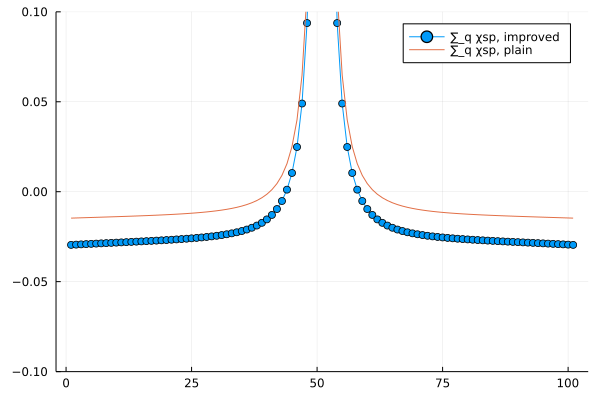

In [60]:
χsp_ω = kintegrate(kG, nlQ_sp.χ, 1)[1,:]
χsp_p_ω = kintegrate(kG_p, nlQ_sp_p.χ, 1)[1,:]
println(LadderDGA.find_usable_interval(real.(χsp_ω)), " : ", LadderDGA.find_usable_interval(real.(χsp_p_ω)))
plot(real.(χsp_ω),ylims=(-0.1,0.1), label="∑_q χsp, improved", markershape=:auto)
plot!(real.(χsp_p_ω), label="∑_q χsp, plain")

In [61]:
qi = 1:10
νi = 51#51#1:100
ωi = 1:101
xch = nlQ_ch.χ[qi,ωi];
xsp = nlQ_sp.χ[qi,ωi]
γch   = nlQ_ch.γ[qi,νi,ωi];
γch_p = nlQ_ch_p.γ[qi,νi,ωi]
γsp   = nlQ_sp.γ[qi,νi,ωi];
γsp_p = nlQ_sp_p.γ[qi,νi,ωi];
λsp = OffsetArray( γsp .* (1 .+ mP.U .* xsp) .- 1, 1:length(qi),-sP.n_iω:sP.n_iω);
λch = OffsetArray( γch .* (1 .- mP.U .* xch) .- 1 , 1:length(qi),-sP.n_iω:sP.n_iω);
γsp_kint = kintegrate(kG, γsp, 1)[1,:]
γch_kint = kintegrate(kG, γch, 1)[1,:]
λsp_kint = OffsetArray(kintegrate(kG, λsp, 1)[1,:],-sP.n_iω:sP.n_iω);
λch_kint = OffsetArray(kintegrate(kG, λch, 1)[1,:],-sP.n_iω:sP.n_iω);

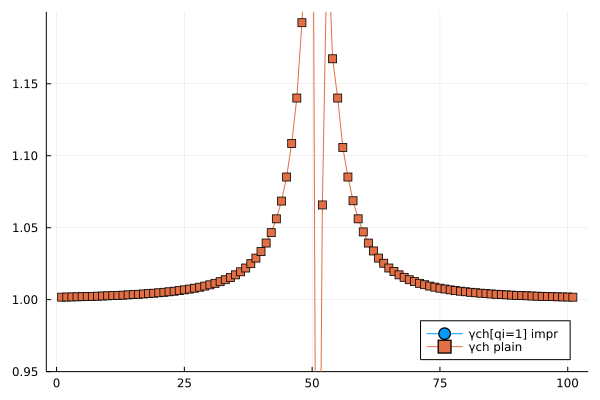

In [62]:
qi_pl = 1
plot(real.(γch[qi_pl,:]), ylims=(0.95,1.2),label="γch[qi=$qi_pl] impr", markershape=:auto, legend=:bottomright)
plot!(real.(nlQ_ch_p.γ[qi_pl,νi,ωi]),label="γch plain", markershape=:auto)
#plot!(real.(γsp[qi_pl,:]),label="γsp impr")
#plot!(real.(nlQ_sp_p.γ[qi_pl,νi,ωi]), label="γsp plain")
#plot!(real.(γsp_kint), label="γsp kint")
#plot!(real.(γsp_kint), label="γch kint")

# Non-Local χ₀ sum test

First Plot tests the asymptotic bubble sum from the internal LadderDGA code. The result is plotted against the known asymptotic tail of χ₀[q,ω->oo]

In [65]:
function χ₀_shell_sum_core3(β::Float64, ω_ind_grid::AbstractVector{Int}, n_iν::Int, shift)
   res = OffsetArray(zeros(ComplexF64, length(ω_ind_grid), 4), ω_ind_grid, 1:4)
   iω_grid = iω_array(β, ω_ind_grid)
   for ωn in ω_ind_grid
        si = shift*trunc(Int,ωn/2)
        iν_ind_grid = (-n_iν-abs(minimum(ω_ind_grid))-si):(n_iν+abs(maximum(ω_ind_grid))-si-1)
        iν_grid = OffsetArray(iν_array(β, iν_ind_grid), iν_ind_grid)
        for νn in (-n_iν-si):(n_iν-si-1)
            res[ωn,1] += 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^1) 
            res[ωn,2] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^2) 
            res[ωn,3] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^2) 
            res[ωn,4] += 1/(iν_grid[νn]^3 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^3) 
        end
    end
    return res
end

function χ₀_shell_sum3(core::OffsetArray{ComplexF64,2}, ωn::Int, β::Float64, c1::Float64, c2::Float64, c3::Float64)::ComplexF64
    res = (core[ωn,1] + c1*core[ωn,2] + c2*core[ωn,3] + c3*core[ωn,4])/β
    ωn2 = 2*(2*ωn*π/β)^2
    res += ωn == 0 ? -(-β/4+c2*β^3/48+c3*β^3/24) : ((c3-c2)*β/ωn2)
    return res
end
#((c3-c2)*β/ωn2) vs ((c3-c2)*β/ωn2)
tmp = convert.(ComplexF64, kG.ϵkGrid .+ mP.U*mP.n/2 .- mP.μ)
c1 = mP.U*mP.n/2 - mP.μ + kintegrate(kG, kG.ϵkGrid)
c2_arr = real.(LadderDGA.conv(kG, tmp, tmp))
c3 = real.(kintegrate(kG, tmp .^ 2) + (mP.U^2)*(mP.n/2)*(1-mP.n/2));

χ₀_core = sum(bubble.data[:,11:110,:], dims=[2])[:,1,:] ./ mP.β^2 
χ₀_res = zeros(size(χ₀_core))
χ₀_res2 = zeros(size(χ₀_core))
χ₀_res3 = zeros(size(χ₀_core))
χ₀_res4 = zeros(size(χ₀_core))
χ₀_res5 = zeros(size(χ₀_core))
χ₀_rest_int = LadderDGA.BSE_SC.χ₀_shell_sum_core(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift))
χ₀_rest = χ₀_shell_sum_core2(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift))
for qi = 1:10
for (ωi,ωn) = enumerate(-sP.n_iω:sP.n_iω)
    χ₀_asym_int = LadderDGA.BSE_SC.χ₀_shell_sum(χ₀_rest_int, ωn, mP.β, bubble.c1, bubble.c2[qi], bubble.c3)
    χ₀_asym = χ₀_shell_sum2(χ₀_rest, ωn, mP.β, c1, c2_arr[qi], c3)
    χ₀_res[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym_int) )#* (2*ωn*π/mP.β)^2)
    χ₀_res2[qi,ωi] = real((χ₀_core[qi,ωi]) )#* (2*ωn*π/mP.β)^2)
    χ₀_res3[qi,ωi] = real((χ₀_core[qi,ωi] - χ₀_asym))
    χ₀_res4[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym_int) * (2*ωn*π/mP.β)^2)
    χ₀_res5[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym) * (2*ωn*π/mP.β)^2)
end
end

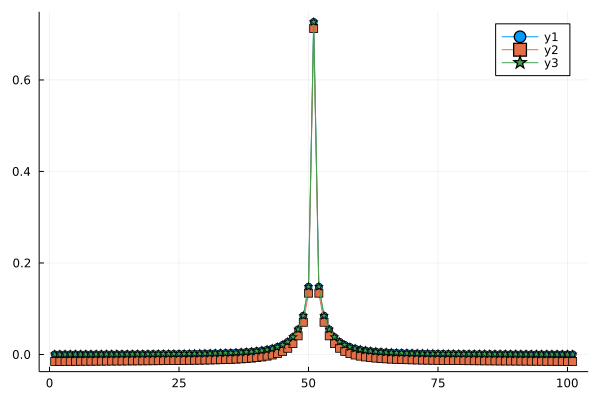

In [66]:
qi_pl = 1
plot(χ₀_res[1,:], markershape=:auto)
plot!(χ₀_res2[1,:], markershape=:auto)
plot!(χ₀_res3[1,:], markershape=:auto)

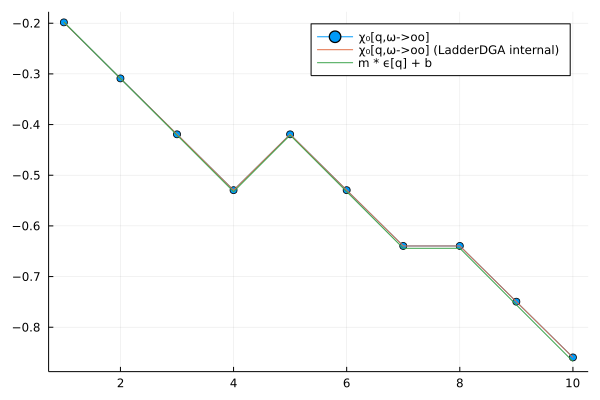

In [24]:
m = mP.Ekin_DMFT/(6*kG.t)
b = (2 * mP.Epot_DMFT + mP.Ekin_DMFT - mP.U*(mP.n^2)/2)
plot(-χ₀_res4[:,end], label="χ₀[q,ω->oo]", markershape=:auto)
plot!(-χ₀_res5[:,end], label="χ₀[q,ω->oo] (LadderDGA internal)" )
plot!( m .* kG.ϵkGrid .+ b, label="m * ϵ[q] + b")
#plot!( -2.6 .* kG.ϵkGrid .- 6.5,label="auch richtig")

In [25]:
gImp_slice = (201-50):(201+49)
λ_asym_test = (((locQ_sp.γ[1,:,51] .* (1 .+ mP.U .* locQ_sp.χ[1, 51]) .- 1) ./ (-mP.U)) .- 1);
print("Δ (χ₀Loc - gImp * gImp * (-mP.β))")
maximum(abs.(χ₀Loc.data[1,11:110,51] .- (-mP.β).*gImp[1,1,1,gImp_slice].*gImp[1,1,1,gImp_slice]))

Δ (χ₀Loc - gImp * gImp * (-mP.β))

7.105427357601002e-15

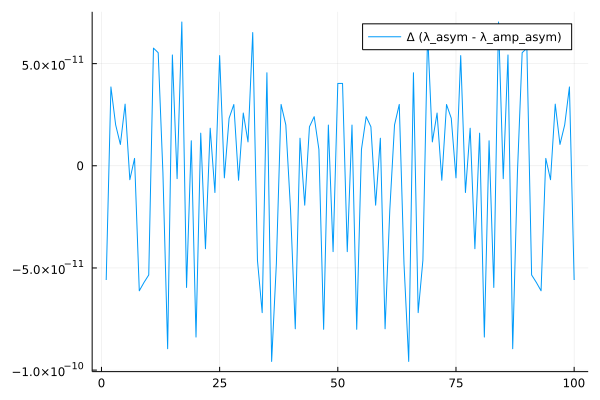

In [42]:
plot(real.(λsp_ed_amp_asym[51:150,101] .* (χ₀Loc.data[1,11:110,51]/(-mP.β)) .- λsp_ed_asym[51:150,101]), label="Δ (λ_asym - λ_amp_asym)")

In [ ]:
locQ_sp.χ[1,ωi]

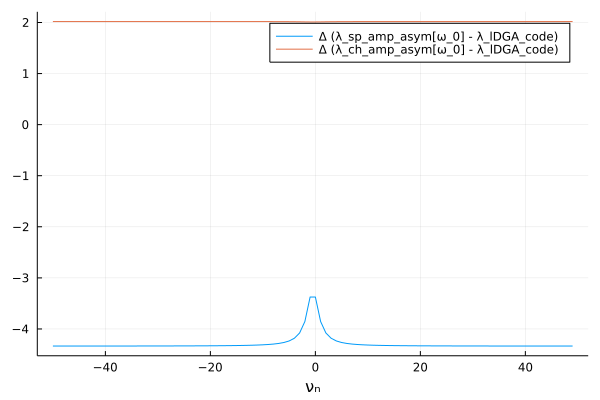

In [37]:
ωi = 51
ωn = ωi - sP.n_iω - 1
asym_slice = (51:150) .- trunc(Int, ωn/2)
asym_omega = ωi + 50
#λsp_asym_test = (((locQ_sp.γ[1,:,ωi] .* (1 .+ mP.U .* locQ_sp.χ[1, ωi]) .- 1)  .- 1);
s = 1
λsp_asym = -s*(locQ_sp.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_sp.χ[1, ωi]) ) .+ s 
s = -1
λch_asym = -s*(locQ_ch.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_ch.χ[1, ωi]) ) .+ s

plot(-50:49,real.(λsp_ed_amp_asym[asym_slice,asym_omega] .+ 1 .- λsp_asym), xlabel="νₙ", label="Δ (λ_sp_amp_asym[ω_$ωn] - λ_lDGA_code)")
plot!(-50:49,real.(λch_ed_amp_asym[asym_slice,asym_omega] .+ 1 .- λch_asym), xlabel="νₙ", label="Δ (λ_ch_amp_asym[ω_$ωn] - λ_lDGA_code)")
#plot!(-50:49,real.(λsp_ed_asym[asym_slice,asym_omega] .- λsp_asym .* (χ₀Loc[1,11:110,ωi]/(-mP.β))), label="Δ (λ_asym - λ_lDGA_code .* χ₀/(-β))")

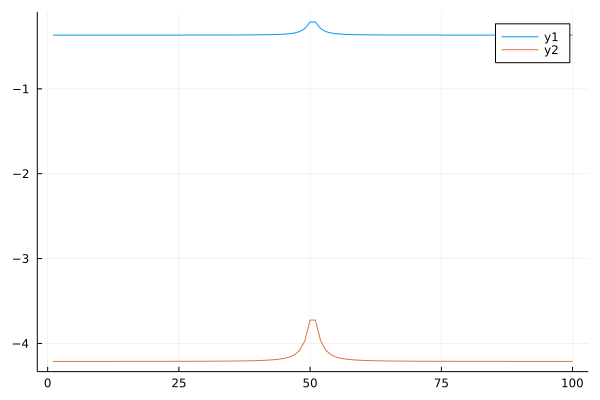

In [41]:
plot(real.(locQ_sp.γ[1,:,ωi]))
plot!(real.(λsp_ed_amp_asym[asym_slice,asym_omega]) .- 1)

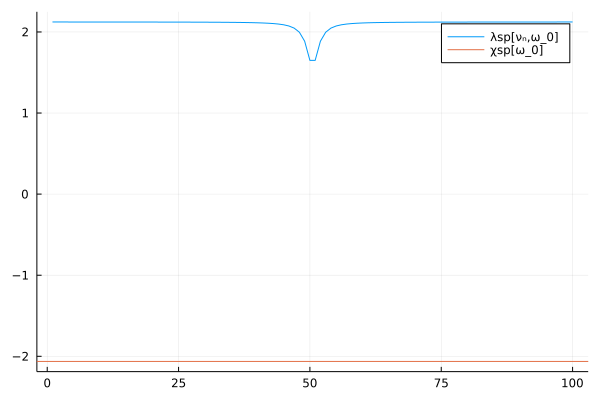

In [29]:
ωi = 51
s = +1
λsp_asym = -s*(locQ_sp.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_sp.χ[1, ωi]) ) .+ s
s = -1
λch_asym = -s*(locQ_ch.γ[1,:,ωi] .* (1 .- s*mP.U .* locQ_ch.χ[1, ωi]) ) .+ s
plot(real.(λsp_asym), label="λsp[νₙ,ω_$(ωi - sP.n_iω-1)]")
hline!([-real.(locQ_sp.χ[1, ωi])], label="χsp[ω_$(ωi - sP.n_iω-1)]")

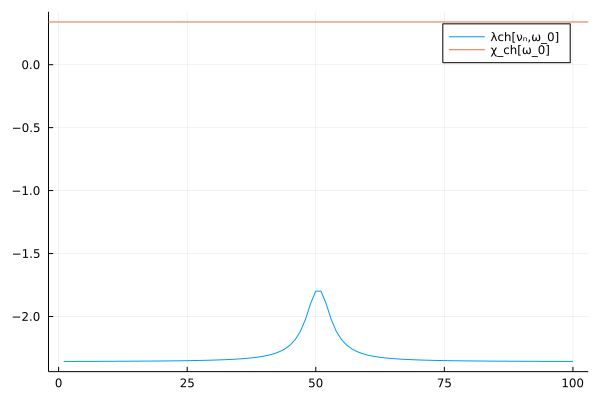

In [36]:
plot(real.(λch_asym), label="λch[νₙ,ω_0]")
hline!([real.(locQ_ch.χ[1, ωi])], label="χ_ch[ω_0]")

In [602]:
using LinearAlgebra
#include("/home/julian/Hamburg/BSE_SC.jl/src/build_chi_asympt.jl")

function build_diag_updo(ωn, χ₀, h)
    i1_l = h.ind1_list
    i2_l = view(h.ind2_list, :, ωn)
    fill!(h.diag_asym_buffer, 0)
    for i in 1:length(i1_l)
        i1 = h.I_asympt[i]
        i2 = i1_l[i]
        i3 = i2_l[i]
        h.diag_asym_buffer[i1[1]] += (mP.U^2)*(h.χch_asympt[i2] - h.χpp_asympt[i3])*(-χ₀[i1[2]])/mP.β^2
    end
end
c2 = mP.μ-mP.U*(mP.n/2)
c3 = (mP.μ-mP.U*(mP.n/2))^2 + mP.sVk + mP.U^2 * (mP.n/2) * (1 - mP.n/2);
bs_old = calc_χ₀_shell_sum_old(mP.β, c2, c3, n_iω, n_iν, Int64(sP.shift));

function improve_λ₀2(type, kG, χ₀, locQ, F, h)
    s = (type == :ch) ? -1 : +1
    tmp = convert.(ComplexF64, kG.ϵkGrid .+ mP.U*mP.n/2 .- mP.μ)
    c1 = mP.U*mP.n/2 - mP.μ + kintegrate(kG, kG.ϵkGrid)
    c2_arr = real.(LadderDGA.conv(kG, tmp, tmp))
    c3 = real.(kintegrate(kG, tmp .^ 2) + (mP.U^2)*(mP.n/2)*(1-mP.n/2))
    #c1 = mP.U*mP.n/2 - mP.μ 
    #c2_arr = [c1 ^ 2]
    #c3 = (mP.μ-mP.U*(mP.n/2))^2 + mP.sVk + mP.U^2 * (mP.n/2) * (1 - mP.n/2)
    
    χ₀_rest = χ₀_shell_sum_core(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, sP.shift)
    
    res = zeros(ComplexF64, size(χ₀,1), length(-sP.n_iν:sP.n_iν-1), size(χ₀,3))
    res2 = similar(res)
    res3 = similar(res)
    res3 = similar(res)
    res4 = similar(res)
    
    #λsp_asym = -s*(locQ_sp.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_sp.χ[1, ωi]) ) .+ s
    #s = -1
    #λch_asym = -s*(locQ_ch.γ[1,:,ωi] .* (1 .- s*mP.U .* locQ_ch.χ[1, ωi]) ) .+ s
    
    #TODO: sign .+ mP.U .* locQ.
    for ωi in 1:size(χ₀,3)
        ωn = ωi - sP.n_iω - 1
        ind_core = (h.Nν_shell+1):(size(χ₀,2)-h.Nν_shell)
        λ_asym = -s*(locQ.γ[1,:,ωi] .* (1 .+ mP.U .* locQ.χ[1, ωi]) ) .+ s
        for qi in 1:size(χ₀,1)
            λcore = [s*dot(χ₀[qi,ind_core,ωi], F[νi,:,ωi] )/(mP.β^2) for νi in 1:size(F,1)]
            χ₀_asym = χ₀_shell_sum(χ₀_rest, ωn, mP.β, c1, c2_arr[qi], c3)
            #println(real(bs[ωi]), " vs ", real(χ₀_asym))
            if type == :ch || type == :sp
                LadderDGA.BSE_SC.F_diag!(type, ωn, mP.U, mP.β, χ₀[qi,:,ωi], h)
            else
                build_diag_updo(ωn, χ₀[qi,:,ωi], h)
            end
            LadderDGA.BSE_SC.F_diag!(type, ωn, mP.U, mP.β, χ₀[qi,:,ωi], h)
            #println(size(λcore))
            res[qi,:,ωi] = λcore #.+ χ₀_asym.*mP.U.*(λ_asym .- 1) .+ view(h.diag_asym_buffer, ind_core)
                    #
                    #χ₀_asym.*mP.U.*(λ_loc_asym[ωi] .+ 1)
                    # .- view(h.diag_asym_buffer, ind_core) #λ_asym .+ 
            #res2[qi,:,ωi] = λcore
            res2[qi,:,ωi]  = -s*χ₀_asym.*mP.U.*(λ_asym)
            res3[qi,:,ωi] .= -χ₀_asym.*mP.U.*(1)
            res4[qi,:,ωi]  = view(h.diag_asym_buffer, ind_core)
                    #view(h.diag_asym_buffer, ind_core) .+ (λ_loc_ω[ωi] .- s)*mP.U*(χ₀_asym)
        end
    end
    return res, res2, res3, res4
end

improve_λ₀2 (generic function with 2 methods)

In [603]:
core_sp, asym_1_sp, asym_2_sp, asym_3_sp = improve_λ₀2(:sp, kG, bubble, locQ_sp, Fsp, sP.χ_helper);
core_ch, asym_1_ch, asym_2_ch, asym_3_ch = improve_λ₀2(:ch, kG, bubble, locQ_ch, Fch, sP.χ_helper);
r1_ch = core_ch .+ asym_1_ch .+ asym_2_ch .+ asym_3_ch;
r1_sp = core_sp .+ asym_1_sp .+ asym_2_sp .+ asym_3_sp;

ch: fit: -0.0932, Σ_loc: -0.0979, left-right: -0.1079
sp: fit: 0.0819, Σ_loc: 0.0979, left-right: 0.0947


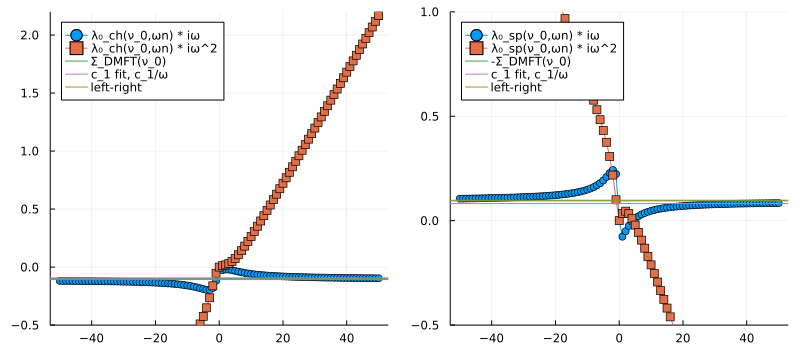

In [613]:
using LsqFit
qi = 1
νi = 51
νn = νi - sP.n_iν - 1
ωrange_s = -sP.n_iω:sP.n_iω
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/mP.β,ωrange_s)
Σ_loc_os = Σ_loc#OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc, dims=1),-length(Σ_loc):length(Σ_loc)-1)
r1_sp_full = to_m_index(r1_sp, sP);
r1_ch_full = to_m_index(r1_ch, sP);

iω_i_arr = 2*im*(ωrange_s)*π/mP.β
fitr = 40:50
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_i_arr[fitr])
p0 = [0.0, 0.0, 0.0, 0.0]

yd = r1_ch_full[qi,νn,:] .* iω_n_arr
ydata_sp_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
lmr_ch = imag(yd[50]+yd[-50])/2
println("ch: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_ch,digits=4))")



p1 = plot(ωrange_s,imag.(r1_ch_full[1,0,:].parent .* iω_i_arr[1:end]), ylims=(-0.5,2.2), legend=:topleft, markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_ch_full[1,0,:].parent .* iω_i_arr[1:end].^2 ), markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω^2")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ imag(Σ_loc_os[νi-51])], label="Σ_DMFT(ν_$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")
hline!([ lmr_ch], label="left-right")

yd = r1_sp_full[qi,νn,:] .* iω_n_arr
ydata_sp_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
lmr_sp = imag(yd[50]+yd[-50])/2
println("sp: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(-imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_sp,digits=4))")

ωrange_s = -sP.n_iω:sP.n_iω
iω_i_arr = 2*im*(ωrange_s)*π/mP.β
p2 = plot(ωrange_s,imag.(r1_sp_full[1,0,:].parent .* iω_i_arr[1:end]), ylims=(-0.5,1.0), legend=:topleft, markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_sp_full[1,0,:].parent .* iω_i_arr[1:end].^2 ), markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω^2")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ -imag(Σ_loc_os[νi-51])], label="-Σ_DMFT(ν_$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")
hline!([ lmr_sp], label="left-right")
plot(p1,p2, size = (800,350))
#savefig("lambda0_fit.pdf")

sp: fit: 0.0902, Σ_loc: -0.0979, left-right: 0.1079
sp: fit: -0.0794, Σ_loc: -0.0979, left-right: -0.0947


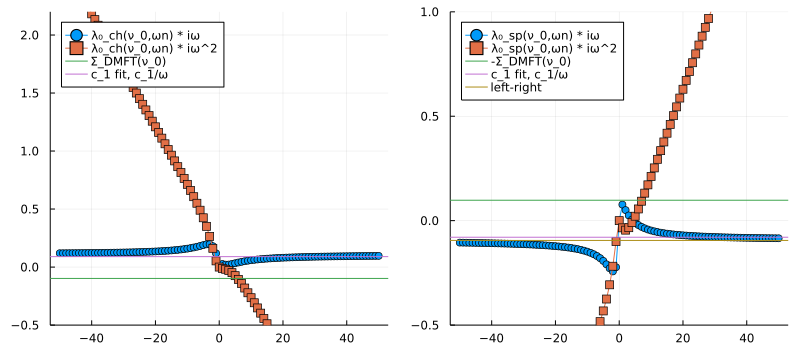

In [595]:
using LsqFit
qi = 1
νi = 51
νn = νi - sP.n_iν - 1
ωrange_s = -sP.n_iω:sP.n_iω
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/mP.β,ωrange_s)
Σ_loc_os = Σ_loc#OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc, dims=1),-length(Σ_loc):length(Σ_loc)-1)
r1_sp_full = to_m_index(r1_sp, sP);
r1_ch_full = to_m_index(r1_ch, sP);

iω_i_arr = 2*im*(ωrange_s)*π/mP.β
fitr = 30:50
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_i_arr[fitr])
p0 = [0.0, 0.0, 0.0, 0.0]

yd = r1_ch_full[qi,νn,:] .* iω_n_arr
ydata_sp_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
lmr_ch = imag(yd[50]+yd[-50])/2
println("sp: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_ch,digits=4))")



p1 = plot(ωrange_s,imag.(r1_ch_full[1,0,:].parent .* iω_i_arr[1:end]), ylims=(-0.5,2.2), legend=:topleft, markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_ch_full[1,0,:].parent .* iω_i_arr[1:end].^2 ), markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω^2")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ imag(Σ_loc_os[νi-51])], label="Σ_DMFT(ν_$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")

yd = r1_sp_full[qi,νn,:] .* iω_n_arr
ydata_sp_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
lmr_sp = imag(yd[50]+yd[-50])/2
println("sp: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_sp,digits=4))")

ωrange_s = -sP.n_iω:sP.n_iω
iω_i_arr = 2*im*(ωrange_s)*π/mP.β
p2 = plot(ωrange_s,imag.(r1_sp_full[1,0,:].parent .* iω_i_arr[1:end]), ylims=(-0.5,1.0), legend=:topleft, markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_sp_full[1,0,:].parent .* iω_i_arr[1:end].^2 ), markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω^2")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ -imag(Σ_loc_os[νi-51])], label="-Σ_DMFT(ν_$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")
hline!([ lmr_sp], label="left-right")
plot(p1,p2, size = (800,350))
#savefig("lambda0_fit.pdf")

In [ ]:
yd

In [ ]:
yd[30:50]

In [ ]:
collect(iω_i_arr[:])

In [ ]:
r1_sp_full[qi,νn,50]

In [ ]:
νi_p = 51
νn_p = νi_p - sP.n_iν - 1
qi_p = 3
xr = 10:50
p1 = plot(xr, imag.(λ_0_UpDo_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="λ_0UpDo[q_$qi_p,iν_$νn_p] * iω", legend=:topleft)
plot!(xr,real.(λ_0_UpDo_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="λ_0UpDo[q_$qi_p,iν_$νn_p] * iω^2")
p2 = plot(xr,imag.(λ_0_ch_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="λ_0ch[q_$qi_p,iν_$νn_p] * iω", legend=:topleft)
plot!(xr,real.(λ_0_ch_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="λ_0ch[q_$qi_p,iν_$νn_p] * iω^2")
p3 = plot(xr ,imag.(λ_0_sp_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="λ_0sp[q_$qi_p,iν_$νn_p] * iω", legend=:topleft)
plot!(xr,real.(λ_0_sp_f[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="λ_0sp[q_$qi_p,iν_$νn_p] * iω^2")
plot(p1, p2, p3, layout = (1,3), size=(800,600))

In [68]:
λ_0_sp_f_impr,bs_qw = improve_λ₀(:sp, kG, λ_0_sp_f, bubble, zeros(size(λsp_loc)));
bs_w = kintegrate(kG, bs_qw, 1)[1,:];

LoadError: MethodError: no method matching kintegrate(::Dispersions.ReducedKGrid_cP{3}, ::ComplexF64, ::Int64)
[0mClosest candidates are:
[0m  kintegrate(::T1, [91m::AbstractArray[39m, ::Int64) where T1<:Dispersions.ReducedKGrid at /home/julian/.julia/packages/Dispersions/dxUIM/src/BZIntegration.jl:14
[0m  kintegrate(::T1, [91m::AbstractArray[39m, ::Int64, [91m::T2[39m) where {T1<:Dispersions.ReducedKGrid, T2<:Dispersions.KSum} at /home/julian/.julia/packages/Dispersions/dxUIM/src/BZIntegration.jl:14
[0m  kintegrate(::T1, [91m::AbstractVector{T2}[39m; type) where {T1<:Dispersions.ReducedKGrid, T2<:Number} at /home/julian/.julia/packages/Dispersions/dxUIM/src/BZIntegration.jl:19

In [69]:
plot(abs.(bs_qw[1,xr] .* iω_n_arr[xr] .^2),markershape=:auto,legend=nothing)
plot!(abs.(bs_w[xr] .* iω_n_arr[xr] .^2),markershape=:auto,legend=nothing)

LoadError: MethodError: no method matching getindex(::ComplexF64, ::Int64, ::UnitRange{Int64})
[0mClosest candidates are:
[0m  getindex(::Number, ::Integer) at number.jl:96
[0m  getindex(::Number, [91m::Integer...[39m) at number.jl:101
[0m  getindex(::Number) at number.jl:95
[0m  ...

In [70]:
λ_0_updo_f_impr  = 0.5 .* (λ_0_ch_f_impr .- λ_0_sp_f_impr)
λ_0_updo_f_impr2 = 0.5 .* (λ_0_ch_f_impr2 .- λ_0_sp_f_impr2)

p1 = plot(xr, imag.(λ_0_sp_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="sp * iω", legend=:topleft)
plot!(xr, real.(λ_0_sp_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="sp * iω^2")
p2 = plot(xr, imag.(λ_0_ch_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="ch * iω", legend=:topleft)
plot!(xr, real.(λ_0_ch_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="ch * iω^2")
p3 = plot(xr, imag.(λ_0_updo_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="ud * iω", legend=:topleft)
plot!(xr, real.(λ_0_updo_f_impr[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="ud * iω^2")

p4 = plot(xr, imag.(λ_0_sp_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="2, sp * iω", legend=:topleft)
plot!(xr, real.(λ_0_sp_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="2, sp * iω^2")
p5 = plot(xr, imag.(λ_0_ch_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="2, ch * iω", legend=:topleft)
plot!(xr, real.(λ_0_ch_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="2, ch * iω^2")
p6 = plot(xr, imag.(λ_0_updo_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr]), markershape=:auto, label="2, ud * iω", legend=:topleft)
plot!(xr, real.(λ_0_updo_f_impr2[qi_p,νi_p,xr .+ sP.n_iω .+ 1] .* iω_n_arr[xr] .^2), markershape=:auto, label="2, ud * iω^2")
title = plot( title="λ_0,r improved at q=$(round.(kG.kGrid[qi_p],digits=2)), ν=$(νn_p))", grid = false, showaxis = false, bottom_margin = -50Plots.px)
l = @layout [a{0.01h}; grid(1,3)]
plot(title, p4,p5,p6, layout = l, size=(900,600))

LoadError: MethodError: no method matching getindex(::ComplexF64, ::Int64, ::Int64, ::UnitRange{Int64})
[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer...[39m) at number.jl:101
[0m  getindex(::Number, ::Integer) at number.jl:96
[0m  getindex(::Number) at number.jl:95
[0m  ...

In [ ]:
r1_sp_full[qi,νn,:]

# Fits

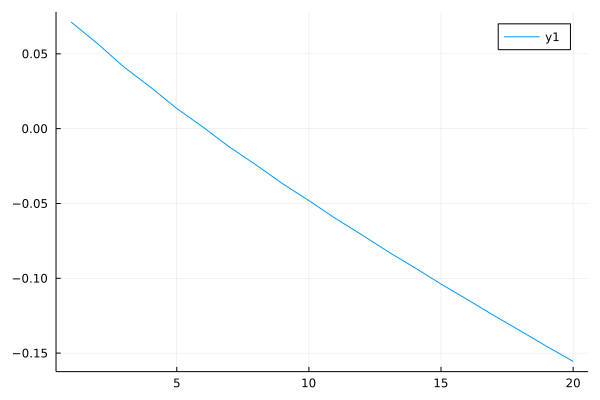

In [373]:
plot(imag(λ_0_sp_f[qi,νi,71:90] .* iω_n_arr[20:39] .^ 1))

In [390]:
using LsqFit
qi = 6
νi = 1
ωrange_s = -sP.n_iω:sP.n_iω
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/mP.β,ωrange_s)
fitr = 10:sP.n_iω-10
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_n_arr[20:39])
#ydata_sp_impr = imag(λ_0_sp_f_impr[qi,νi,fitr] .* iω_n_arr[fitr])
ydata_sp_impr2 = imag(λ_0_sp_f_impr2[qi,νi,71:90] .* iω_n_arr[20:39])
p0 = [0.0, 0.0, 0.0]
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
println("$(fit2.param[1]) vs $(imag(Σ_loc[νi]))")

-0.027334202748423537 vs -0.09785873063807116


In [381]:

fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
println("result $(LsqFit.confidence_interval(fit2, 0.03)) (97% confidence) \n$(fit2.param)  with errors $(estimate_errors(fit2))")

result [(-0.03752958380527319, -0.01872315513578019), (0.4693404887847571, 0.9381902758084667), (-3.248702286189645, -0.4214350378235996)] (97% confidence) 
[-0.02812636947052669, 0.7037653822966119, -1.8350686620066223]  with errors [0.00837778264785601, 0.2088605805604086, 1.2594751991714133]


In [382]:
- imag(Σ_loc[νi])

0.09785873063807116